In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [54]:
df = pd.read_csv('household_power_consumption.csv',parse_dates={'DateTime':['Date','Time']},infer_datetime_format=True,index_col='DateTime')

In [6]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
2006-12-16 17:25:00,5.36,0.436,233.63,23,0,1,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23,0,2,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23,0,1,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...
2008-12-13 21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
2008-12-13 21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
2008-12-13 21:36:00,0.422,0.076,241.73,1.8,0,0,0.0


In [55]:
df['Global_active_power']= pd.to_numeric(df['Global_active_power'],errors='coerce').fillna(0).astype(float)

df['Voltage']= pd.to_numeric(df['Voltage'],errors='coerce').fillna(0).astype(float)
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce').fillna(0).astype(float)
df['Global_intensity']= pd.to_numeric(df['Global_intensity'],errors='coerce').fillna(0).astype(float)
df['Sub_metering_1']= pd.to_numeric(df['Sub_metering_1'],errors='coerce').fillna(0).astype(float)
df['Sub_metering_2']= pd.to_numeric(df['Sub_metering_2'],errors='coerce').fillna(0).astype(float)
df['Sub_metering_3']= pd.to_numeric(df['Sub_metering_3'],errors='coerce').fillna(0).astype(float)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2008-12-13 21:38:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  float64
 1   Global_reactive_power  1048575 non-null  float64
 2   Voltage                1048575 non-null  float64
 3   Global_intensity       1048575 non-null  float64
 4   Sub_metering_1         1048575 non-null  float64
 5   Sub_metering_2         1048575 non-null  float64
 6   Sub_metering_3         1048575 non-null  float64
dtypes: float64(7)
memory usage: 64.0 MB


In [57]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.103902e+00,1.178142e-01,2.390286e+02,4.699814e+00,1.172882e+00,1.469452e+00,5.910810e+00
std,1.129456e+00,1.095406e-01,1.527486e+01,4.763377e+00,6.309331e+00,6.341029e+00,8.202752e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.860000e-01,0.000000e+00,2.379300e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.420000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.542000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01


In [58]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [59]:
sum(df.duplicated())

80746

In [60]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Data visualization

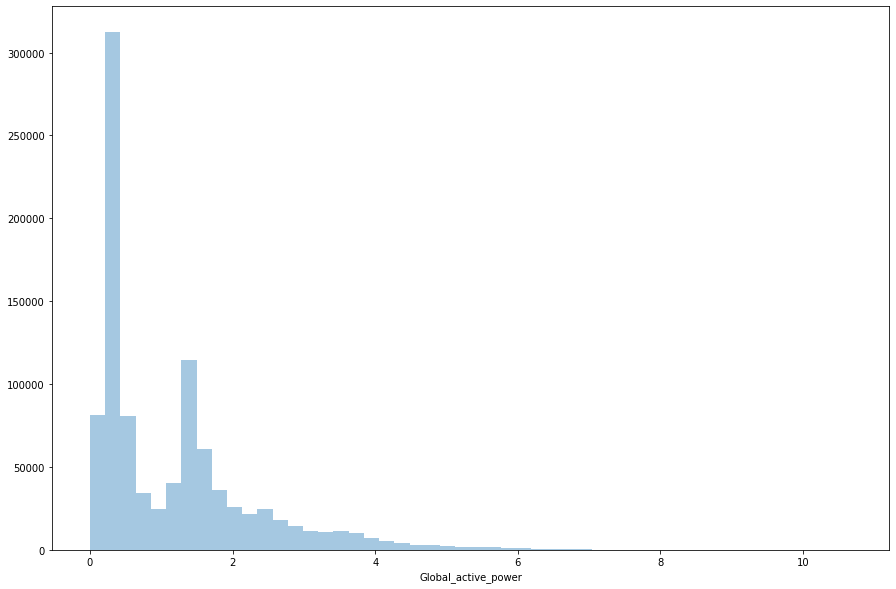

In [61]:
plt.figure(figsize=(15,10))
sns.distplot(df.Global_active_power,kde=False,bins=50)

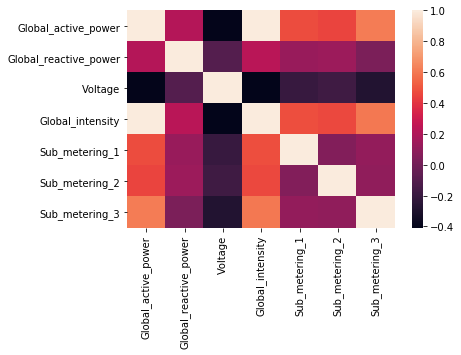

In [62]:
sns.heatmap(df.corr())

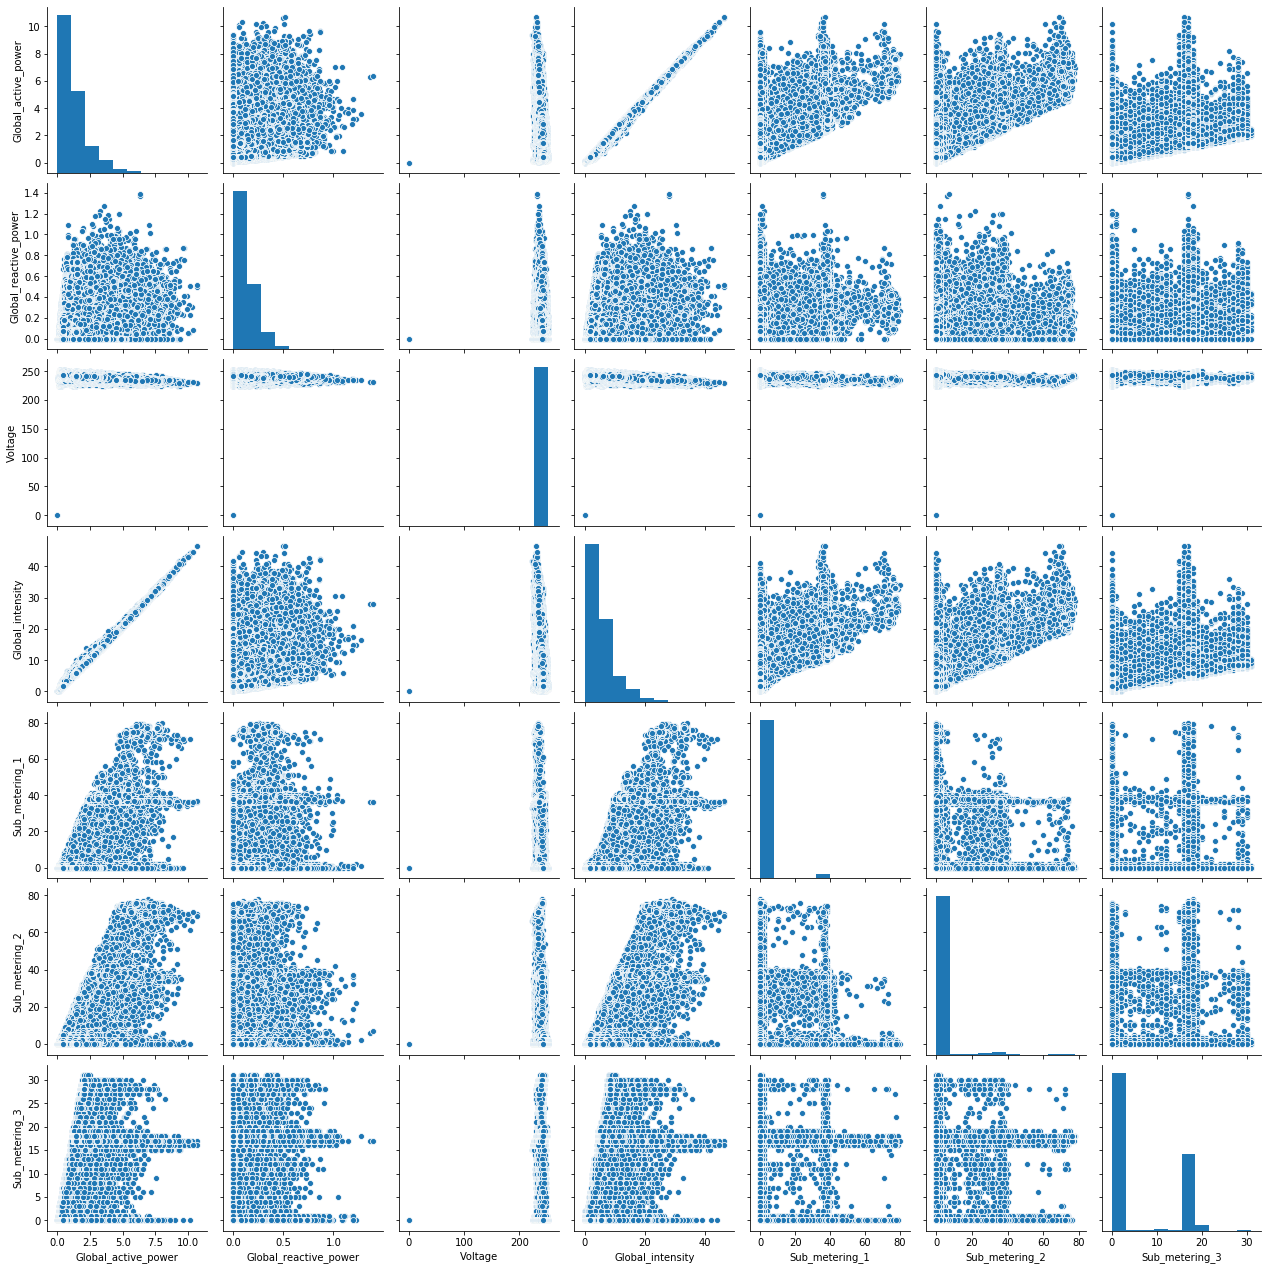

In [63]:
sns.pairplot(df)

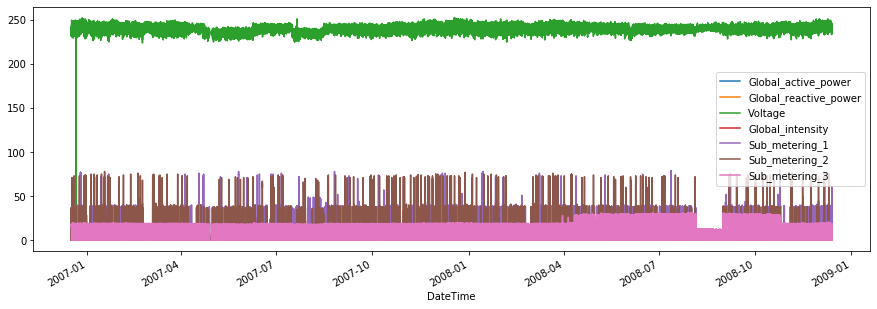

In [64]:
df.plot(figsize=(15,5),) # time-series analysis
plt.show()

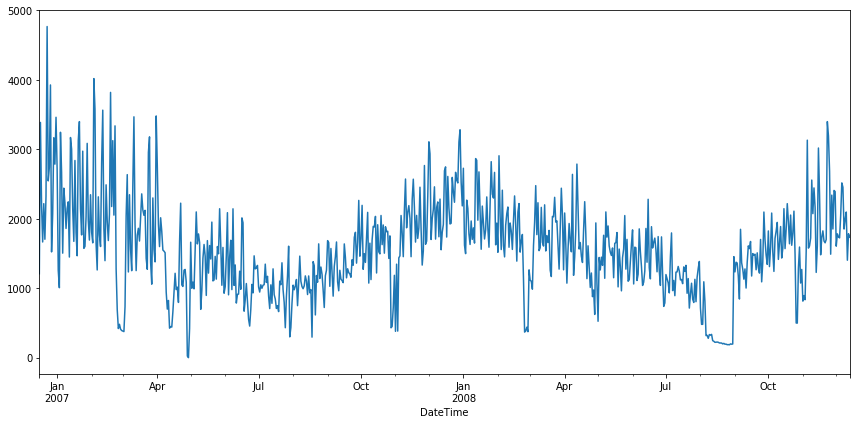

In [65]:
#resampling
plt.figure(figsize=(12,6))
df.Global_active_power.resample('1D').sum().plot()
plt.tight_layout()

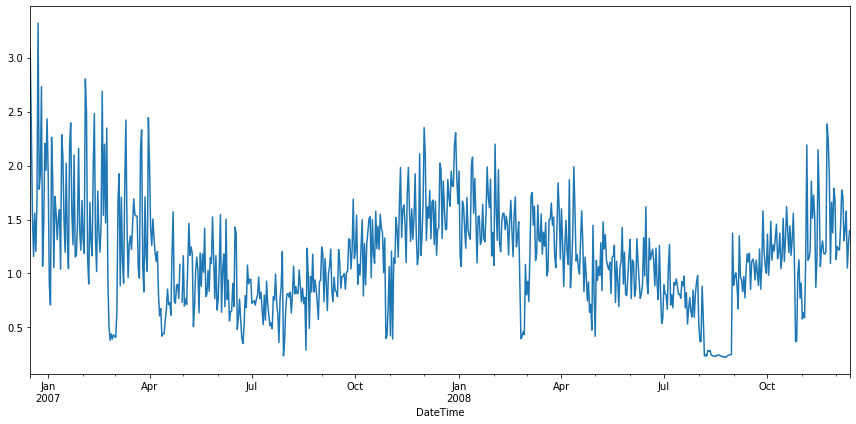

In [66]:
plt.figure(figsize=(12,6))
df.Global_active_power.resample('D').mean().plot()  #mean() gives the sum of global_active_power for an hour
plt.tight_layout()

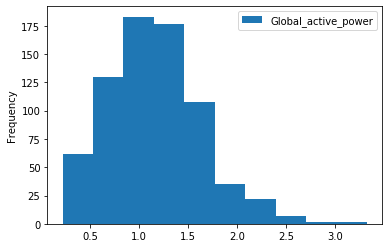

In [67]:
df.Global_active_power.resample('D').mean().plot(kind='hist',legend=True)

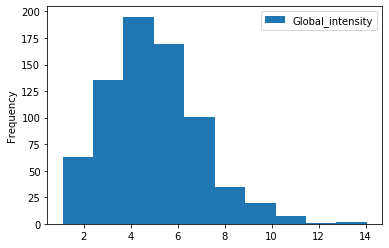

In [68]:
df.Global_intensity.resample('D').mean().plot(kind='hist',legend=True)

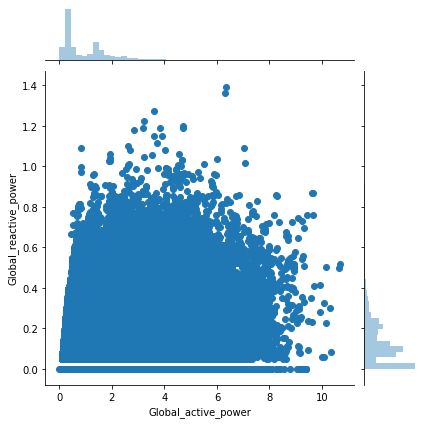

In [69]:
sns.jointplot(x='Global_active_power',y='Global_reactive_power',data=df,kind='scatter')

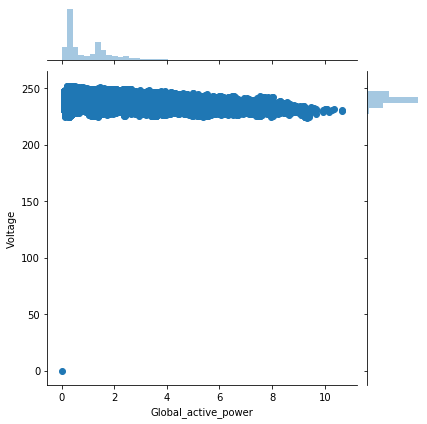

In [70]:
sns.jointplot(x='Global_active_power',y='Voltage',data=df,kind='scatter')

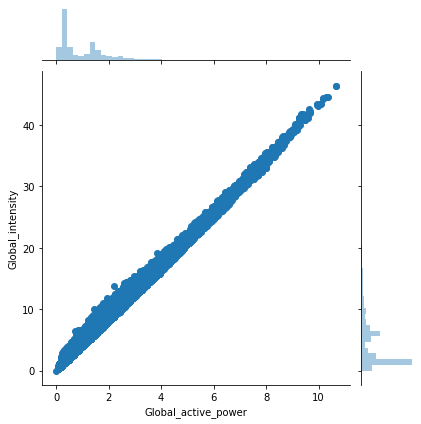

In [71]:
sns.jointplot(x='Global_active_power',y='Global_intensity',data=df,kind='scatter')

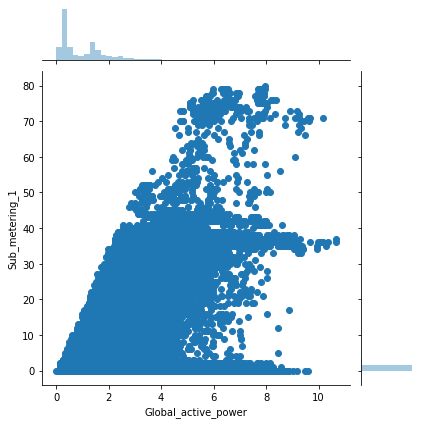

In [72]:
sns.jointplot(x='Global_active_power',y='Sub_metering_1',data=df,kind='scatter')

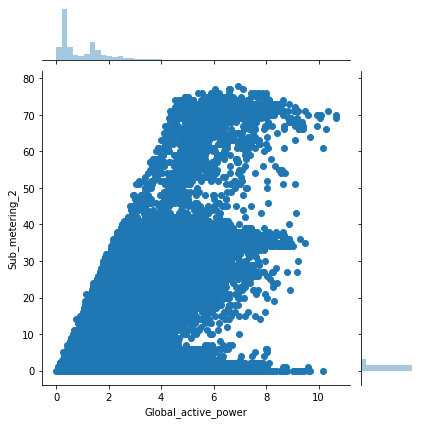

In [73]:
sns.jointplot(x='Global_active_power',y='Sub_metering_2',data=df,kind='scatter')

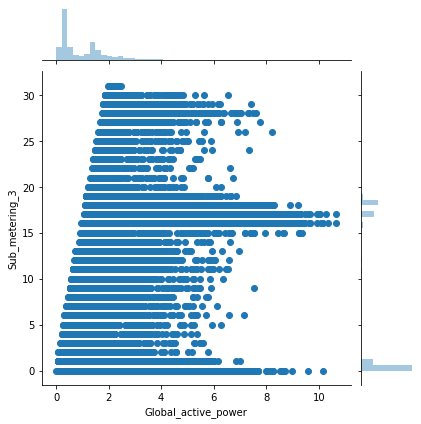

In [74]:
sns.jointplot(x='Global_active_power',y='Sub_metering_3',data=df,kind='scatter')

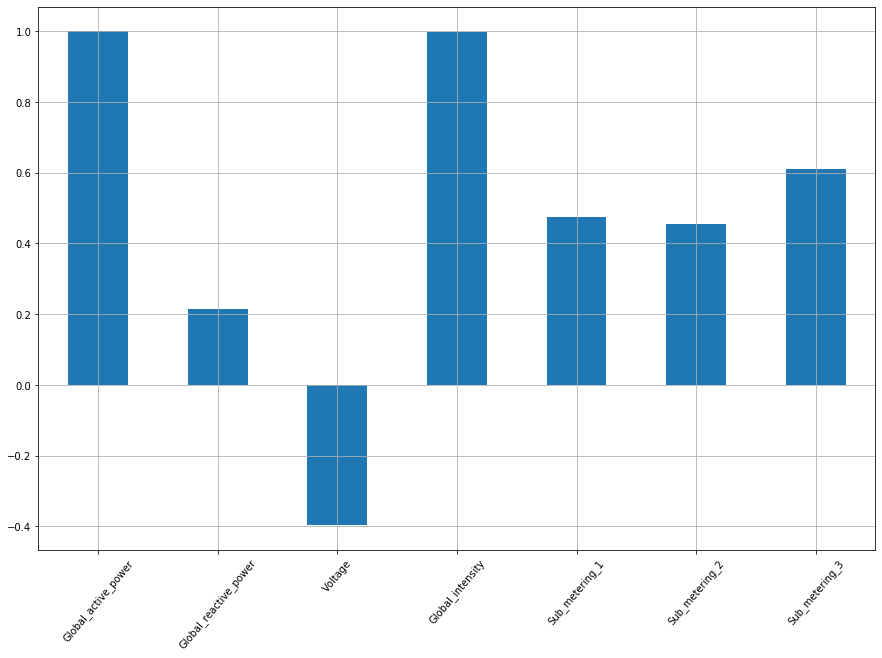

In [75]:
plt.figure(figsize=(15,10))
df.corrwith(df['Global_active_power']).plot.bar(grid=True,rot=50)

From the above data visualization we can see that voltage has the least correlation with global active power. So we can drop it


In [87]:
df.drop('Voltage',axis=1,inplace=True)


Prediction Model

In [89]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [93]:
X=df.drop('Global_active_power',axis=1)
X.shape


(967829, 5)

In [94]:
y=df['Global_active_power']
y.shape

(967829,)

In [95]:
from sklearn.model_selection import train_test_split



In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [99]:
X_train

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,
2008-11-20 07:37:00,0.072,7.6,2.0,0.0,17.0
2008-10-11 16:37:00,0.000,1.8,0.0,2.0,1.0
2008-08-05 21:15:00,0.246,1.4,0.0,2.0,1.0
2008-09-04 18:08:00,0.000,0.8,0.0,0.0,0.0
2007-11-14 15:27:00,0.206,6.8,0.0,0.0,17.0
...,...,...,...,...,...
2007-11-15 02:26:00,0.074,1.2,0.0,1.0,0.0
2008-03-02 16:34:00,0.176,4.2,0.0,2.0,0.0
2007-03-28 09:00:00,0.372,6.8,1.0,1.0,18.0


Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train1 = pd.DataFrame(scaler.fit_transform(X_train))
X_train1.columns = X_train.columns.values
X_train1.index = X_train.index.values
X_train=X_train1
X_test1=pd.DataFrame(scaler.fit_transform(X_test))
X_test1.columns = X_test.columns.values
X_test1.index = X_test.index.values
X_test=X_test1

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()

In [109]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
print(lm.intercept_)

0.04892019278325388


In [111]:
lm.coef_

array([-0.23397337, 10.92194262, -0.02645949, -0.04079506,  0.06246296])

In [112]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coff'])

In [113]:
cdf


,coff
Global_reactive_power,-0.233973
Global_intensity,10.921943
Sub_metering_1,-0.026459
Sub_metering_2,-0.040795
Sub_metering_3,0.062463


In [114]:
prid = lm.predict(X_test)

In [115]:
y_test


DateTime
2008-01-01 09:31:00    1.452
2007-10-15 08:38:00    1.334
2007-05-15 21:32:00    0.522
2008-12-06 10:44:00    3.008
2008-11-22 12:37:00    0.428
                       ...  
2008-05-25 01:20:00    0.678
2008-09-15 01:41:00    0.356
2007-06-29 02:12:00    0.236
2007-05-16 10:38:00    1.494
2008-08-02 15:06:00    0.310
Name: Global_active_power, Length: 290349, dtype: float64

In [116]:
prid

array([1.4846502 , 1.44678385, 0.68849341, ..., 0.27193378, 1.6407948 ,
       0.3993323 ])

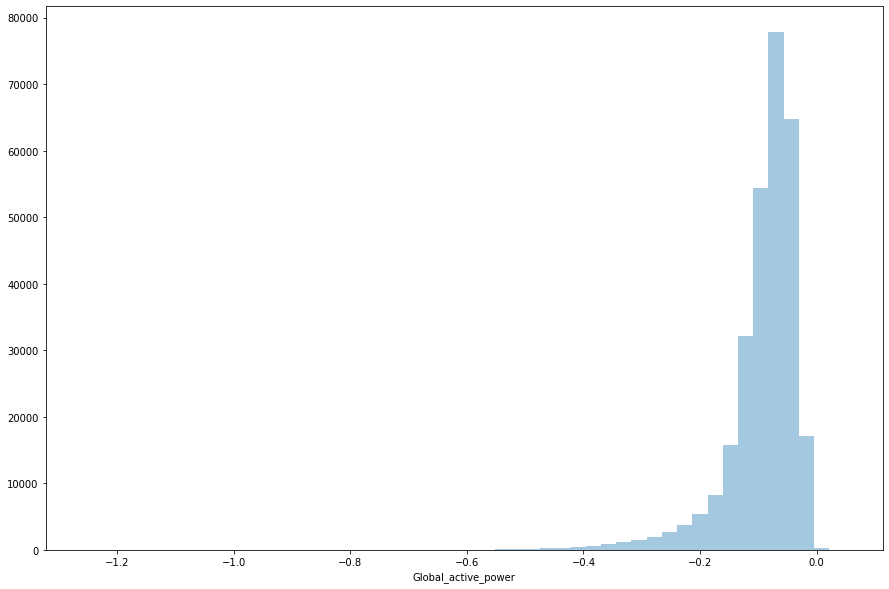

In [118]:
plt.figure(figsize=(15,10))
sns.distplot((y_test-prid),kde=False)

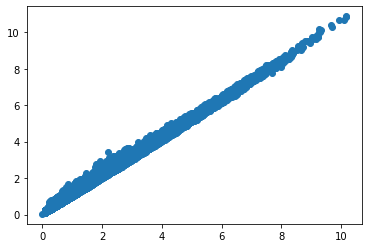

In [128]:
plt.scatter(y_test,prid)


In [120]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': prid})
result

,Actual,Predicted
DateTime,,
2008-01-01 09:31:00,1.452,1.484650
2007-10-15 08:38:00,1.334,1.446784
2007-05-15 21:32:00,0.522,0.688493
2008-12-06 10:44:00,3.008,3.208946
2008-11-22 12:37:00,0.428,0.521370
...,...,...
2008-05-25 01:20:00,0.678,0.739889
2008-09-15 01:41:00,0.356,0.491702
2007-06-29 02:12:00,0.236,0.271934


In [77]:
 from sklearn import metrics

In [79]:
print(metrics.mean_absolute_error(y_test,prid))
print(metrics.mean_squared_error(y_test,prid))
print(np.sqrt(metrics.mean_squared_error(y_test,prid)))

0.028037464920365483
0.0018965488455940282
0.04354938398638984
